In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np
import time


## only look at stories with 10+ shares. Group stories by title.

In [2]:
df = pandas.read_csv('DATA/USERS/all_data.csv',  dtype={'candidates': 'S10'})

In [3]:
len(df)

137978

In [4]:
df.columns

Index([u'_id', u'author', u'sentiment', u'time', u'tweet', u'url', u'a_id',
       u'title', u'date_written', u'org', u't_id', u'candidates'],
      dtype='object')

In [5]:
stories_gt_10 = df.title.value_counts()[df.title.value_counts() >= 10].index

In [6]:
print len(set(stories_gt_10))

2657


In [7]:
subset = df[df.title.isin(stories_gt_10)]
print len(subset)

123113


In [8]:
subset.to_csv('DATA/GT_10_STORIES/subset.csv')

In [9]:
print len(subset.author.unique())
print len(set(subset.author))

20956
20956


In [10]:
outfi = open('DATA/GT_10_STORIES/authors.csv', 'w')
for item in list(set(subset.author)):
  outfi.write("%s\n" % item)
outfi.close()

## Basic Stats

In [11]:
len(set(subset.author))

20956

In [19]:
print "Tweets per Author"
subset.author.value_counts().describe(percentiles=[.10,.25,.5,.75,.99])

Tweets per Author


count    20956.000000
mean         5.874833
std         35.145778
min          1.000000
10%          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
99%        124.000000
max       1246.000000
Name: author, dtype: float64

Publication Distribution


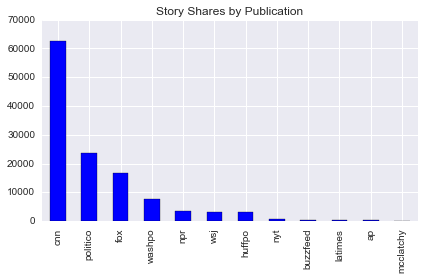

In [22]:
print "Publication Distribution"
subset.org.value_counts().plot(kind='bar', title='Story Shares by Publication')
plt.tight_layout()
plt.savefig('FIGS/SUBSET/pub_dist.png')

In [13]:
#cand2code={'HillaryClinton':0,"JohnKasich":1,'SenSanders':3, 'realDonaldTrump':2,'TedCruz':4}
follows_candid = subset[subset.candidates != '00000'] 
len(set(follows_candid.author))

13472

In [26]:
candids = ['10000','01000','00100','00010','00001']

In [40]:
single_candid = subset[subset.candidates.isin(candids)]
len(set(single_candid.author))
#single_candid.to_csv('DATA/GT_10_STORIES/single_candid.csv')

In [42]:
clinton_camp = subset[subset.candidates == '10000'] 
clinton_camp.to_csv('DATA/GT_10_STORIES/clinton_camp.csv')
kasich_camp = subset[subset.candidates == '01000'] 
kasich_camp.to_csv('DATA/GT_10_STORIES/kasich_camp.csv')
trump_camp = subset[subset.candidates == '00100'] 
trump_camp.to_csv('DATA/GT_10_STORIES/trump_camp.csv')
sanders_camp = subset[subset.candidates == '00010'] 
sanders_camp.to_csv('DATA/GT_10_STORIES/sanders_camp.csv')
cruz_camp = subset[subset.candidates == '00001'] 
cruz_camp.to_csv('DATA/GT_10_STORIES/cruz_camp.csv')

In [25]:
print 'Number of Clinton-only followers:', len(set(clinton_camp.author))
print'Total tweets:', len(clinton_camp)  
print
print 'Number of Trump-only followers:', len(set(trump_camp.author))
print'Total tweets:', len(trump_camp)  
print
print 'Number of Sanders-only followers:', len(set(sanders_camp.author))
print'Total tweets:', len(sanders_camp)  
print
print 'Number of Cruz-only followers:', len(set(cruz_camp.author))
print'Total tweets:', len(cruz_camp)  
print
print 'Number of Kasich-only followers:', len(set(kasich_camp.author))
print'Total tweets:', len(kasich_camp)  
print

Number of Clinton-only followers: 1858
Total tweets: 6432

Number of Trump-only followers: 2018
Total tweets: 8815

Number of Sanders-only followers: 1616
Total tweets: 4725

Number of Cruz-only followers: 916
Total tweets: 3441

Number of Kasich-only followers: 159
Total tweets: 1048



In [29]:
subset.columns

Index([u'_id', u'author', u'sentiment', u'time', u'tweet', u'url', u'a_id',
       u'title', u'date_written', u'org', u't_id', u'candidates'],
      dtype='object')

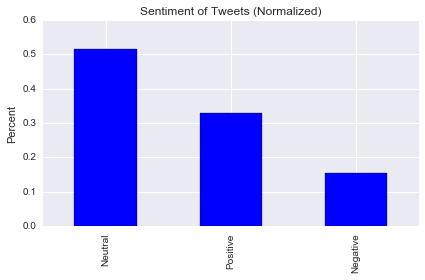

In [39]:
subset.sentiment.value_counts(normalize=True).plot(kind='bar')
plt.title('Sentiment of Tweets (Normalized)')
plt.ylabel('Percent')
plt.tight_layout()
plt.savefig('FIGS/SUBSET/sentiment.png')